In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import datetime as dt

In [54]:
df_sleep = pd.read_csv('./all_user_sleep.csv')
df_step = pd.read_csv('./all_user_steps.csv')
df_heart = pd.read_csv('./all_user_heart.csv')

df_sleep.head(5)

,USERNAME,DATE,STARTTIME,MINUTESASLEEP,MINUTUESAWAKE,TIMEINBED
0,A01,2016-04-01,02:39:00,485,26,511
1,A01,2016-04-02,02:09:00,512,37,549
2,A01,2016-04-04,01:52:30,335,11,346
3,A01,2016-04-05,02:04:00,311,24,335
4,A01,2016-04-06,01:49:00,491,59,551


In [55]:
df_step.head(5)

,USERNAME,DATE,TIME,HOUR,MINUTES,STEPS
0,A01,2016-04-01,00:00:00,0,0,0
1,A01,2016-04-01,00:01:00,0,1,0
2,A01,2016-04-01,00:02:00,0,2,0
3,A01,2016-04-01,00:03:00,0,3,0
4,A01,2016-04-01,00:04:00,0,4,0


In [56]:
df_heart.head(5)

,USERNAME,DATE,TIME,VALUE
0,A01,2016-04-01,00:00:00,79
1,A01,2016-04-01,00:01:00,80
2,A01,2016-04-01,00:02:00,78
3,A01,2016-04-01,00:03:00,73
4,A01,2016-04-01,00:04:00,77


In [57]:
weather = pd.read_csv('./sokulee_weather.csv')
weather.head(3)

,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,2016-04-01,10.8,NaN,0.0,38
1,2016-04-01,9.5,NaN,0.1,49
2,2016-04-01,8.6,NaN,0.3,49


In [58]:
max_temp = weather.groupby(["DATETIME"])["TEMPERATURE"].nlargest(1).reset_index(name="MAX_TEMP")
max_temp.head(3)

,DATETIME,level_1,MAX_TEMP
0,2016-04-01,15,24.9
1,2016-04-02,39,24.1
2,2016-04-03,60,16.3


In [59]:
mean_hum= weather.groupby(["DATETIME"])["HUMIDITY"].mean().reset_index(name="MEAN_HUM")
mean_hum.head(3)

,DATETIME,MEAN_HUM
0,2016-04-01,37.208333
1,2016-04-02,40.958333
2,2016-04-03,64.916667


In [60]:
total_rain = weather.groupby(["DATETIME"])["RAINFALL"].sum().reset_index(name="TOTAL_RAIN")
total_rain.head(3)

,DATETIME,TOTAL_RAIN
0,2016-04-01,0.0
1,2016-04-02,0.0
2,2016-04-03,2.5


In [61]:
mean_wind = weather.groupby(["DATETIME"])["WINDSPEED"].mean().reset_index(name="MEAN_WIND")
mean_wind.head(3)

,DATETIME,MEAN_WIND
0,2016-04-01,0.979167
1,2016-04-02,1.145833
2,2016-04-03,1.379167


In [62]:
weather_df = pd.merge(max_temp, mean_hum, on=['DATETIME'], how="inner" )
weather_df = pd.merge(weather_df, total_rain, on=["DATETIME"], how="inner")
weather_df = pd.merge(weather_df, mean_wind, on=["DATETIME"], how='inner')

weather_df = weather_df.drop(['level_1'], axis=1)
weather_df.head(3)

,DATETIME,MAX_TEMP,MEAN_HUM,TOTAL_RAIN,MEAN_WIND
0,2016-04-01,24.9,37.208333,0.0,0.979167
1,2016-04-02,24.1,40.958333,0.0,1.145833
2,2016-04-03,16.3,64.916667,2.5,1.379167


In [63]:
total_step = df_step.groupby(["USERNAME", "DATE"])["STEPS"].sum().reset_index(name="STEPS")
mean_step = total_step.groupby(["USERNAME"])["STEPS"].mean().reset_index(name="MEAN_STEP")

mean_step.head(5)

,USERNAME,MEAN_STEP
0,A01,6771.02
1,A010,5254.30
2,A016,10700.10
3,A017,13946.88
4,A018,15999.28


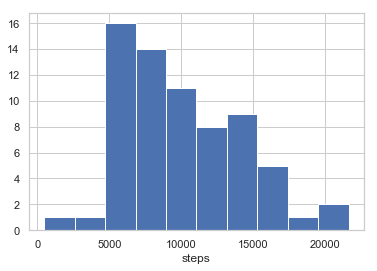

In [64]:
# Step
mean_step['MEAN_STEP'].hist()
plt.xlabel('steps')
plt.show()

평균 10,000 걸음이 안되는 사람 : 57.35%


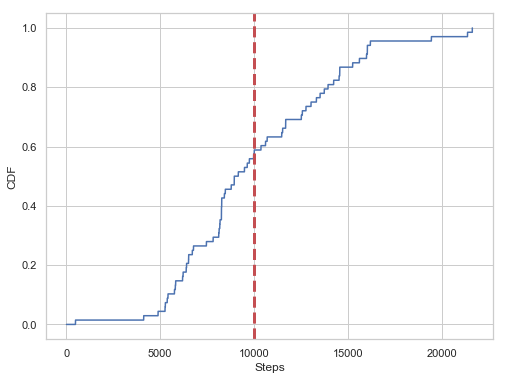

In [65]:
# Step
step_list = [int(step) for step in mean_step['MEAN_STEP']]
step_list_count = np.zeros(max(step_list)+1)
for step in step_list:
    step_list_count[int(step)] += 1
    
step_cumsum = step_list_count.cumsum()
step_cdf = [cumsum/step_cumsum[-1] for cumsum in step_cumsum]

print('평균 10,000 걸음이 안되는 사람 : {0}%'.format(round(step_cdf[10000]*100, 2)))


plt.figure(figsize=(8,6))
plt.plot(step_cdf)
plt.axvline(x=10000, color='r', linestyle='--',linewidth=3)
plt.xlabel('Steps')
plt.ylabel('CDF')
plt.show()

In [66]:
total_sleep = df_sleep.groupby(["USERNAME", "DATE"])["MINUTESASLEEP"].sum().reset_index(name="MINUTESASLEEP")
mean_sleep = total_sleep.groupby(["USERNAME"])["MINUTESASLEEP"].mean().reset_index(name="MEAN_SLEEP")

mean_sleep.head(5)

,USERNAME,MEAN_SLEEP
0,A01,371.357143
1,A010,420.733333
2,A016,303.900000
3,A017,343.816327
4,A018,370.217391


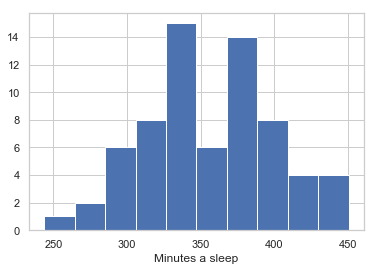

In [67]:
# Sleep
mean_sleep['MEAN_SLEEP'].hist()
plt.xlabel('Minutes a sleep')
plt.show()

평균 수면 6시간이 안되는 사람 : 48.53%


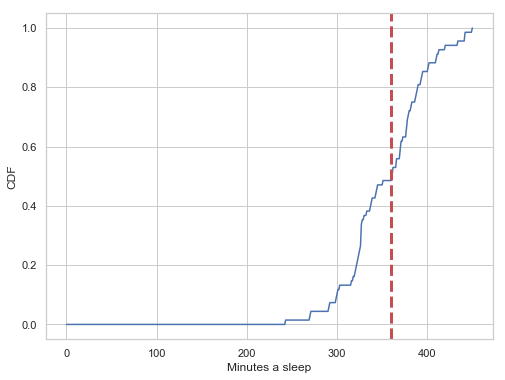

In [68]:
# Sleep
sleep_list = [int(sleep) for sleep in mean_sleep['MEAN_SLEEP']]
sleep_list_count = np.zeros(max(sleep_list)+1)
for sleep in sleep_list:
    sleep_list_count[int(sleep)] += 1
    
sleep_cumsum = sleep_list_count.cumsum()
sleep_cdf = [cumsum/sleep_cumsum[-1] for cumsum in sleep_cumsum]

print('평균 수면 6시간이 안되는 사람 : {0}%'.format(round(sleep_cdf[360]*100, 2)))


plt.figure(figsize=(8,6))
plt.plot(sleep_cdf)
plt.axvline(x=360, color='r', linestyle='--',linewidth=3)
plt.xlabel('Minutes a sleep')
plt.ylabel('CDF')
plt.show()

In [69]:
total_heart = df_heart.groupby(["USERNAME", "DATE", "TIME"])["VALUE"].sum().reset_index(name="VALUE")
mean_heart = total_heart.groupby(["USERNAME"])["VALUE"].mean().reset_index(name="MEAN_VALUE")

mean_heart.head(5)

,USERNAME,MEAN_VALUE
0,A01,81.601382
1,A010,75.746871
2,A016,83.939182
3,A017,77.922819
4,A018,74.145573


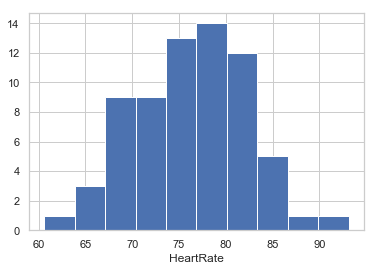

In [70]:
# Heart
mean_heart['MEAN_VALUE'].hist()
plt.xlabel('HeartRate')
plt.show()

평균 심박수 60이 안되는 사람 : 1.47%


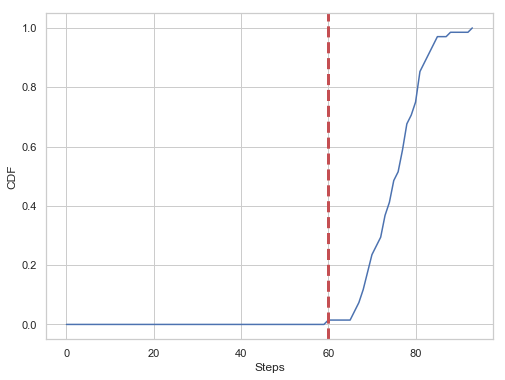

In [71]:
# Heart
heart_list = [int(heart) for heart in mean_heart['MEAN_VALUE']]
heart_list_count = np.zeros(max(heart_list)+1)
for heart in heart_list:
    heart_list_count[int(heart)] += 1
    
heart_cumsum = heart_list_count.cumsum()
heart_cdf = [cumsum/heart_cumsum[-1] for cumsum in heart_cumsum]

print('평균 심박수 60이 안되는 사람 : {0}%'.format(round(heart_cdf[60]*100, 2)))

plt.figure(figsize=(8,6))
plt.plot(heart_cdf)

plt.axvline(x=60, color='r', linestyle='--',linewidth=3)
plt.xlabel('Steps')
plt.ylabel('CDF')
plt.show()

In [72]:
date_step = df_step.groupby(["USERNAME", "DATE"])["STEPS"].sum().reset_index(name="STEPS")
date_step = date_step.groupby(["USERNAME", "DATE"])["STEPS"].mean().reset_index(name="STEPS")

date_step.head(3)

,USERNAME,DATE,STEPS
0,A01,2016-04-01,13468
1,A01,2016-04-02,9446
2,A01,2016-04-03,6084


In [73]:
date_sleep = df_sleep.groupby(["USERNAME", "DATE"])["MINUTESASLEEP"].mean().reset_index(name="SLEEP")
date_sleep.head(3)

,USERNAME,DATE,SLEEP
0,A01,2016-04-01,485
1,A01,2016-04-02,512
2,A01,2016-04-04,335


In [76]:
df_corr = date_step.groupby(["DATE"])["STEPS"].mean().reset_index(name="STEPS")
df_corr2 =date_sleep.groupby(["DATE"])["SLEEP"].mean().reset_index(name="SLEEP")

df_corr = pd.merge(df_corr, df_corr2, on=['DATE'], how='inner')
df_corr = pd.merge(df_corr, weather_df, left_on=['DATE'], right_on=['DATETIME'], how="left")
df_corr = df_corr.drop(['DATETIME'], axis=1)

df_corr['DATE'] = pd.to_datetime(df_corr['DATE'], format='%Y-%m-%d')
df_corr['weekday'] = df_corr['DATE'].apply(lambda x: x.weekday())
df_corr.head(5)

,DATE,STEPS,SLEEP,MAX_TEMP,MEAN_HUM,TOTAL_RAIN,MEAN_WIND,weekday
0,2016-04-01,11632.500000,343.771930,24.9,37.208333,0.0,0.979167,4
1,2016-04-02,10662.938462,336.525424,24.1,40.958333,0.0,1.145833,5
2,2016-04-03,7870.104478,422.937500,16.3,64.916667,2.5,1.379167,6
3,2016-04-04,16206.477612,359.189655,18.0,72.375000,0.0,1.887500,0
4,2016-04-05,13893.089552,335.931034,20.5,40.125000,0.0,1.712500,1


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


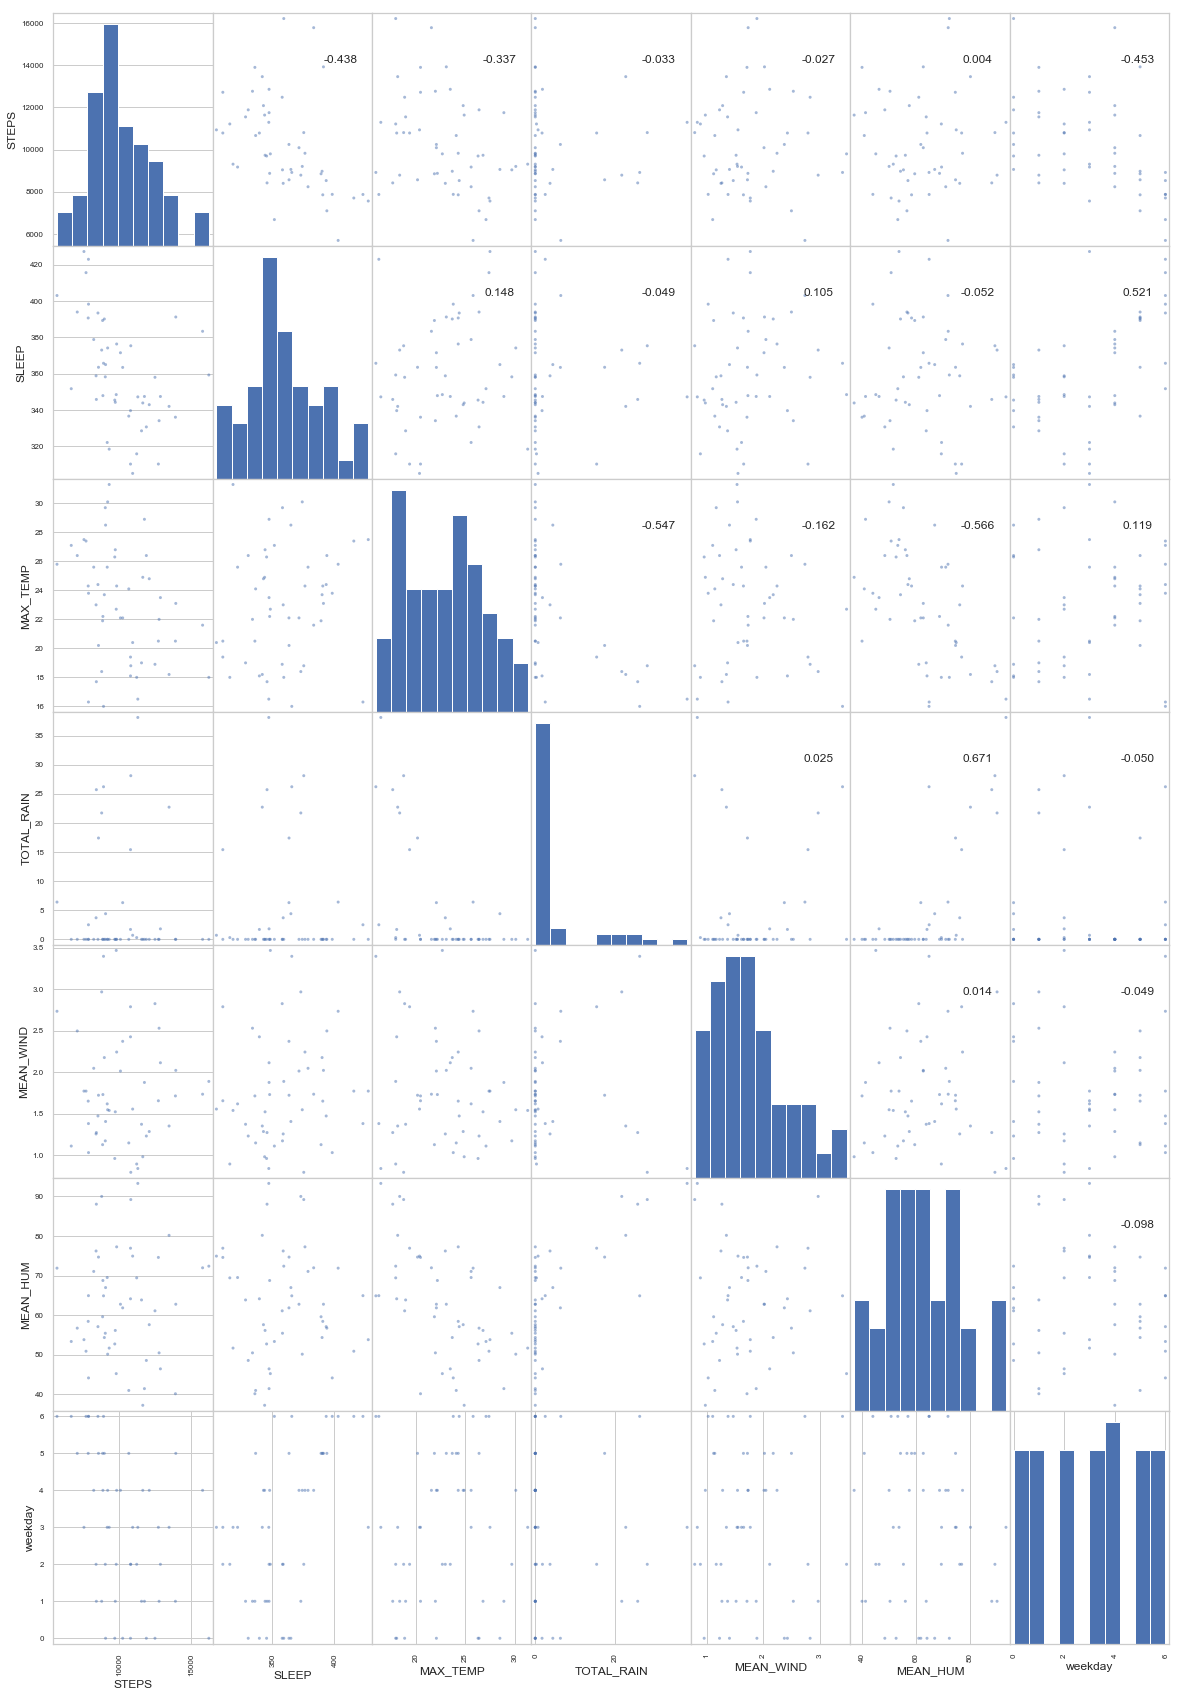

In [77]:
df_subset = df_corr[['STEPS', 'SLEEP', 'MAX_TEMP', 'TOTAL_RAIN', 'MEAN_WIND', 'MEAN_HUM', 'weekday']]

axes = pd.plotting.scatter_matrix(df_subset, figsize = (20, 30), alpha = 0.5)
corr = df_subset.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

In [78]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()


In [79]:
w_step = df_step.groupby(["USERNAME", "DATE"])["STEPS"].sum().reset_index(name="STEPS")
w_step = w_step.groupby(["DATE"])["STEPS"].mean().reset_index(name="STEPS")

w_step['DATE'] = pd.to_datetime(w_step['DATE'], format='%Y-%m-%d')

d = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
w_step['weekday'] = w_step['DATE'].apply(lambda x: d[x.weekday()])

w_step.head(5)

,DATE,STEPS,weekday
0,2016-04-01,11632.500000,FRI
1,2016-04-02,10662.938462,SAT
2,2016-04-03,7870.104478,SUN
3,2016-04-04,16206.477612,MON
4,2016-04-05,13893.089552,TUE


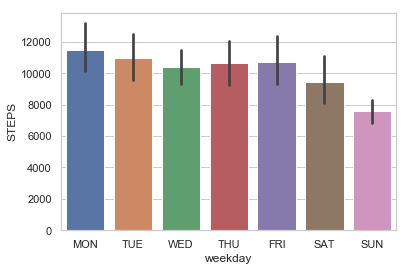

In [80]:
sns.barplot(x="weekday", y="STEPS", data=w_step, order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
plt.show()

In [81]:
w_sleep = df_sleep.groupby(["USERNAME", "DATE"])["MINUTESASLEEP"].sum().reset_index(name="MINUTESASLEEP")
w_sleep = w_sleep.groupby(["DATE"])["MINUTESASLEEP"].mean().reset_index(name="MINUTESASLEEP")

w_sleep['DATE'] = pd.to_datetime(w_sleep['DATE'], format='%Y-%m-%d')

d = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
w_sleep['weekday'] = w_sleep['DATE'].apply(lambda x: d[x.weekday()])

w_sleep.head(5)

,DATE,MINUTESASLEEP,weekday
0,2016-04-01,343.771930,FRI
1,2016-04-02,336.525424,SAT
2,2016-04-03,422.937500,SUN
3,2016-04-04,359.189655,MON
4,2016-04-05,335.931034,TUE


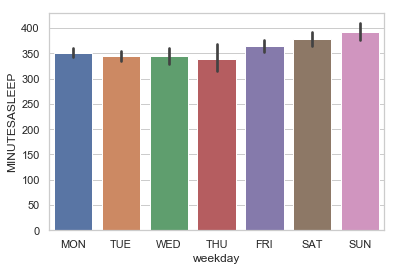

In [82]:
sns.barplot(x="weekday", y="MINUTESASLEEP", data=w_sleep, order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
plt.show()

In [83]:
import numpy as np
import datetime

In [84]:
day_step = df_with_weather.groupby(["USERNAME", "DATE"])["STEPS"].sum().reset_index(name="STEPS")
day_step = df_with_weather.groupby(["DATE"])["STEPS"].mean().reset_index(name="STEPS")
day_step.head(5)

,DATE,STEPS
0,2016-04-01,11632.500000
1,2016-04-02,10662.938462
2,2016-04-03,7870.104478
3,2016-04-04,16206.477612
4,2016-04-05,13893.089552


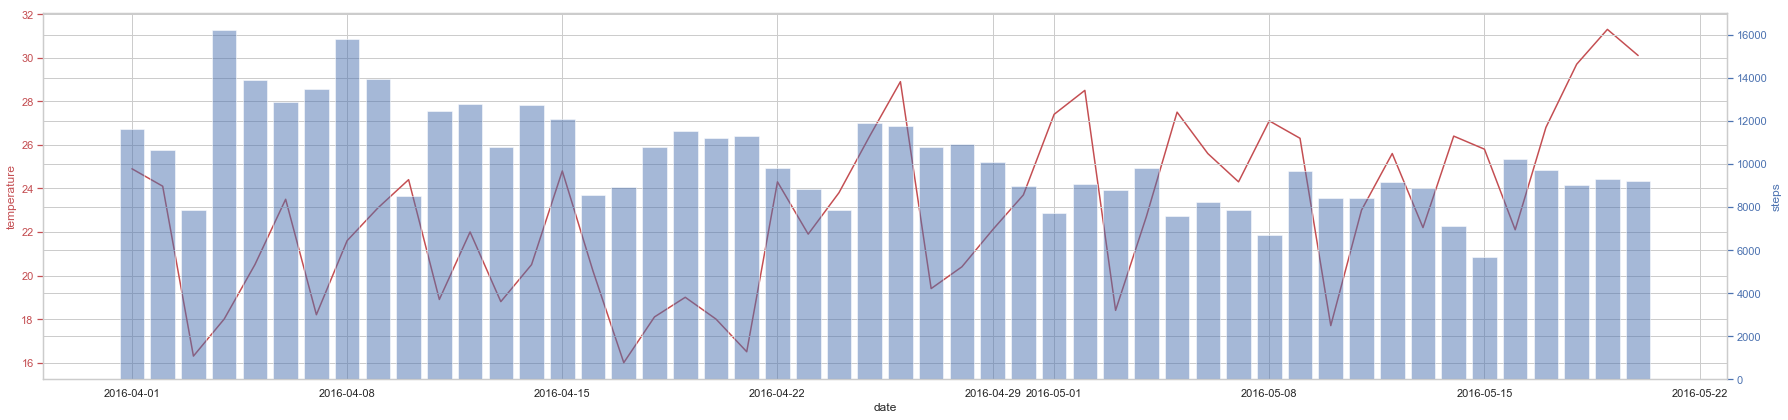

In [85]:
fig, ax1 = plt.subplots(figsize=(25,6))
t = np.arange(np.datetime64('2016-04-01'), np.datetime64('2016-05-21'))

s1 = weather_df["MAX_TEMP"]

ax1.plot(t, s1, 'r-')
ax1.set_xlabel('date')
ax1.set_ylabel('temperature', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()

s2 = day_step['STEPS']
ax2.bar(t, s2, color='b' , alpha=0.5)
ax2.set_ylabel('steps', color='b')
ax2.tick_params('y', colors='b')

fig.tight_layout()
plt.show()

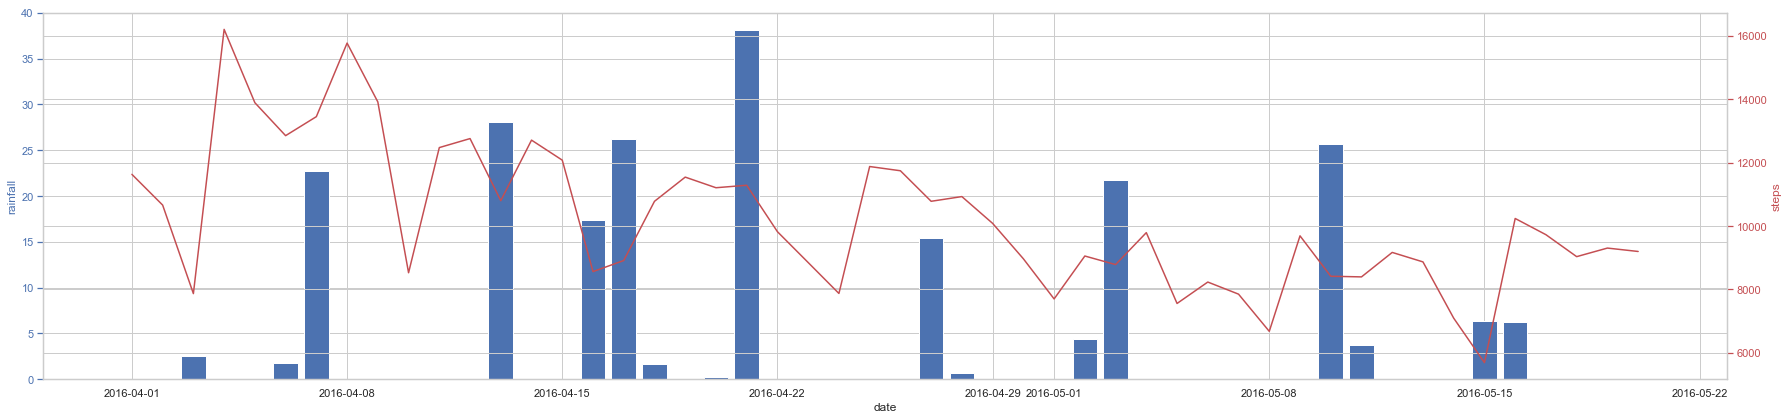

In [86]:
fig, ax1 = plt.subplots(figsize=(25,6))

# 강수량
s1 = weather_df["TOTAL_RAIN"]

ax1.bar(t, s1, color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('rainfall', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

# 걸음
s2 = day_step['STEPS']
ax2.plot(t, s2, 'r')
ax2.set_ylabel('steps', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [87]:
day_heart = df_heart.groupby(["USERNAME", "DATE", "TIME"])["VALUE"].sum().reset_index(name="VALUE")
day_heart = day_heart.groupby(["USERNAME", "DATE"])["VALUE"].mean().reset_index(name="heartrate")

zero_heart = day_heart[(day_heart['heartrate'] != 0)]
zero_heart = zero_heart.groupby(["DATE"])["USERNAME"].count().reset_index(name="Users")


zero_heart = pd.merge(weather_df, zero_heart, left_on=['DATETIME'], right_on=['DATE'], how='outer')
zero_heart = zero_heart.drop(['MAX_TEMP', 'DATETIME', 'MEAN_HUM', 'TOTAL_RAIN', 'MEAN_WIND'], axis=1)
zero_heart.fillna(0)
zero_heart.head(5)

,DATE,Users
0,2016-04-01,61
1,2016-04-02,61
2,2016-04-03,65
3,2016-04-04,65
4,2016-04-05,66


In [88]:
import datetime

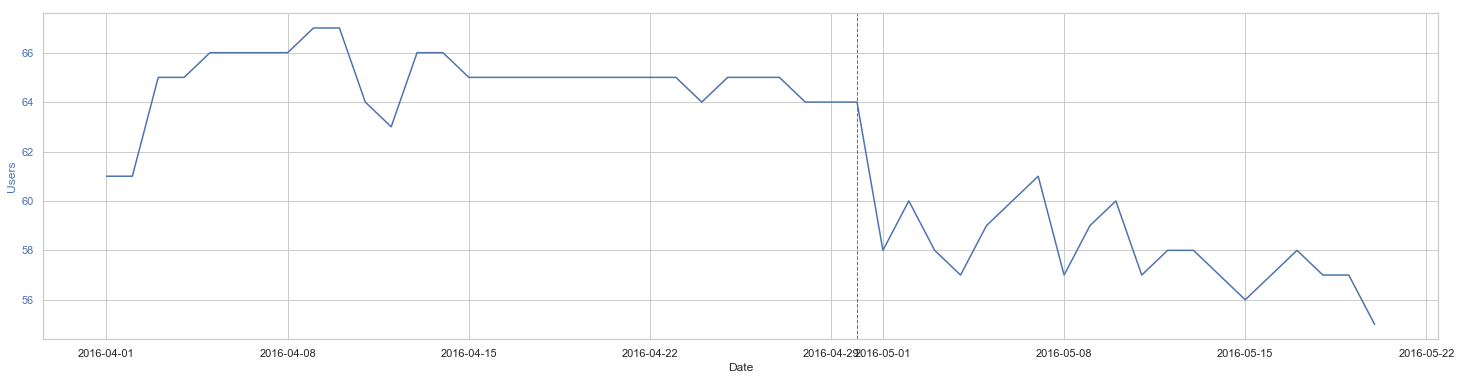

In [89]:
plt.figure(figsize=(25,6))
s1 = zero_heart["Users"]

plt.plot(t, s1, 'b-')
plt.xlabel('Date')
plt.ylabel('Users', color='b')
plt.tick_params('y', colors='b')

plt.axvline(x=datetime.datetime(2016,4, 30), color='r', linestyle='--', linewidth=1)
plt.show()
